#Chopsticks!
Craig Nicholson  
August 29, 2015

A few researchers set out to determine the optimal length of chopsticks for children and adults. They came up with a measure of how effective a pair of chopsticks performed, called the "Food Pinching Performance." The "Food Pinching Performance" was determined by counting the number of peanuts picked and placed in a cup (PPPC).

### An investigation for determining the optimum length of chopsticks.
[Link to Abstract and Paper](http://www.ncbi.nlm.nih.gov/pubmed/15676839)  
*the abstract below was adapted from the link*

Chopsticks are one of the most simple and popular hand tools ever invented by humans, but have not previously been investigated by [ergonomists](https://www.google.com/search?q=ergonomists). Two laboratory studies were conducted in this research, using a [randomised complete block design](http://dawg.utk.edu/glossary/whatis_rcbd.htm), to evaluate the effects of the **length of the chopsticks on the food-serving performance** of adults and children. Thirty-one male junior college students and 21 primary school pupils served as subjects for the experiment to test chopsticks lengths of 180, 210, 240, 270, 300, and 330 mm. The results showed that the **food-pinching performance was significantly affected by the length of the chopsticks**, and that chopsticks of about 240 and 180 mm long were optimal for adults and pupils, respectively. Based on these findings, the researchers suggested that families with children should provide both 240 and 180 mm long chopsticks. In addition, restaurants could provide 210 mm long chopsticks, considering the trade-offs between ergonomics and cost.


In [158]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# pandas is a software library for data manipulation and analysis
# We commonly use shorter nicknames for certain packages. Pandas is often abbreviated to pd.
# hit shift + enter to run this cell or block of code
path = '~/Downloads/P0/chopstick-effectiveness.csv'
dataFrame = pd.read_csv(path)

## 1. What is the independent variable in the experiment?
The independent variable is the length of chopsticks.

## 2. What is the dependent variable in the experiment?

Food-pinching performance (PPPC) is the dependant variable.

{The dependent variable is the variable being measured, the PPPC performance, which is affected by the independent variable}

## 3. How is the dependent variable operationally defined?
The "Food Pinching Performance" was determined by counting the number of peanuts picked and placed in a cup (PPPC).


## 4. Based on the description of the experiment and the data set, list at least two variables that you know were controlled.

Data and Abstract
- material of the chopstick
- gender of subject
- age of subject

Additional Variables:
- height of the cup
- diameter of the opening of the cup
- the size and type of the peanuts
- the length of time the participant was allowed to pick up peanuts and place into a cup
- the number of attempts to pick up each peanut
- temperature in the testing facility
- light in the testing facility
- right or left handed 

Subject Varables:  
Each subject runs the test for each of the Chopstick lengths
- the subjects, 31 male junior college students (age, sex)
- 21 primary school age children (age, sex)

Controlled variables:  
*Are Independent variables that could potentially affect the outcome (dependent variable), but are held constant throughout the experiment.*

### Mean of the entire sample (n) for "Food Pinching Efficiency" 
Let's do a basic statistical calculation on the data using code! Run the block of code below to calculate the average "Food Pinching Efficiency" for all 31 participants and all chopstick lengths.

In [159]:
dataFrame['Food.Pinching.Efficiency'].mean()

25.00559139784947

This number is helpful, but the number doesn't let us know which of the chopstick lengths performed best for the thirty-one male junior college students. Let's break down the data by chopstick length. The next block of code will generate the average "Food Pinching Effeciency" for each chopstick length. Run the block of code below.

### Average "Food Pinching Efficiency" 

In [160]:
meansByChopstickLength = dataFrame.groupby('Chopstick.Length')['Food.Pinching.Efficiency'].mean().reset_index()
meansByChopstickLength

# reset_index() changes Chopstick.Length from an index to column. Instead of the index being the length of the chopsticks, the index is the row numbers 0, 1, 2, 3, 4, 5.

,Chopstick.Length,Food.Pinching.Efficiency
0,180,24.935161
1,210,25.483871
2,240,26.322903
3,270,24.323871
4,300,24.968065
5,330,23.999677


### Median "Food Pinching Efficiency" 
Find the median since outliers can affect the mean.  We see the mean for 180mm and 240mm are within a very narrow range (0.08mm).  We should explore the 180mm data later to see why the mean and median differ more than the other chopstick lengths.

In [161]:
medianByChopstickLength = dataFrame.groupby('Chopstick.Length')['Food.Pinching.Efficiency'].median().reset_index()
medianByChopstickLength

,Chopstick.Length,Food.Pinching.Efficiency
0,180,26.35
1,210,25.42
2,240,26.43
3,270,24.50
4,300,25.09
5,330,23.63


### Calculate the difference between the mean and median
Notice how the 180mm chopstick lenght has a much higher variance than all the other chopstick lengths.  Right now, I am going to move on from this analysis and look at a few other tests.

In [162]:
# Add new column to medianByChopstickLength to log the mean Food Pinching Efficiency
# Add new column to medianByChopstickLength to log the variance between the mean and median.
medianByChopstickLength['meanFPE'] = meansByChopstickLength['Food.Pinching.Efficiency']
medianByChopstickLength['dev_from_mean'] = medianByChopstickLength['Food.Pinching.Efficiency'] - medianByChopstickLength['meanFPE']
medianByChopstickLength['sqrd_dev'] = medianByChopstickLength['dev_from_mean']*medianByChopstickLength['dev_from_mean']
medianByChopstickLength

,Chopstick.Length,Food.Pinching.Efficiency,meanFPE,dev_from_mean,sqrd_dev
0,180,26.35,24.935161,1.414839,2.001769
1,210,25.42,25.483871,-0.063871,0.004080
2,240,26.43,26.322903,0.107097,0.011470
3,270,24.50,24.323871,0.176129,0.031021
4,300,25.09,24.968065,0.121935,0.014868
5,330,23.63,23.999677,-0.369677,0.136661


## 5. Which chopstick length performed the best for the group of thirty-one male junior college students?



The chopstick length of 240mm performed the best for the group of 31 male junior college students.  With a mean Efficiency in PPPC of 26.32.

The 240 mm long chopsticks were the Best

The 330 mm long chopsticks were the worst.

The scatter plots below all show the chopstick length of 240mm has the best PPPC.

Populating the interactive namespace from numpy and matplotlib


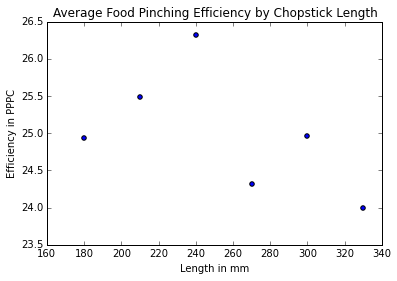

In [163]:
# Causes plots to display within the notebook rather than in a new window
%pylab inline

import matplotlib.pyplot as plt

plt.scatter(x=meansByChopstickLength['Chopstick.Length'], y=meansByChopstickLength['Food.Pinching.Efficiency'])
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")
plt.title("Average Food Pinching Efficiency by Chopstick Length")
plt.show()

y = -0.00783225806452x + 27.0028172043


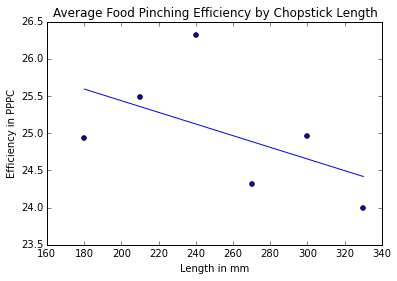

In [164]:
# Overlay the best fit line for the meansByChopstickLength
# Use slope intercept form y = mx + b
# m is the slope
# b is the y intercept where x = 0
m, b = np.polyfit(meansByChopstickLength['Chopstick.Length'], meansByChopstickLength['Food.Pinching.Efficiency'], 1)
plt.scatter(x=meansByChopstickLength['Chopstick.Length'], y=meansByChopstickLength['Food.Pinching.Efficiency'])
plt.plot(meansByChopstickLength['Chopstick.Length'], m*meansByChopstickLength['Chopstick.Length'] + b, '-')
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")
plt.title("Average Food Pinching Efficiency by Chopstick Length")

print 'y = ' + str(m) + 'x + ' + str(b)


The plot above also has the best fit line plotted assuming the realtionship for Chopstick length and PPPC is a linear relationship.

### Plot of mean and median since outliers can affect the mean.
The chopstick length median and mean of 180mm have a much larger difference between the two values than all the other chopstick lengths. 

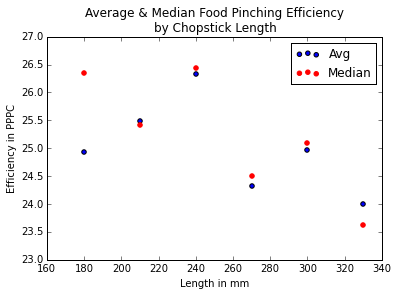

In [165]:
plt.scatter(x=meansByChopstickLength['Chopstick.Length'], y=meansByChopstickLength['Food.Pinching.Efficiency'], label='Avg')
plt.scatter(x=medianByChopstickLength['Chopstick.Length'], y=medianByChopstickLength['Food.Pinching.Efficiency'], label='Median', color='red')
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")
plt.title("Average & Median Food Pinching Efficiency \nby Chopstick Length")
plt.legend()
plt.show()


### Check to see if the 180mm outlier is truly and outlier

In [166]:
df = dataFrame[dataFrame['Chopstick.Length']== 180]
df.pop('Individual')
df.pop('Chopstick.Length')
df.describe()

,Food.Pinching.Efficiency
count,31.000000
mean,24.935161
std,4.020612
min,14.470000
25%,22.740000
50%,26.350000
75%,27.910000
max,31.190000


Outlier = 26.35  
Outlier < Q1 - 1.5(IQR)  
Outlier > Q3 + 1.5(IQR)  

Outlier < 22.74 - 1.5 (27.91-22.74)  
False

Outlier > 27.91 + 1.5 (27.91-22.74)  
False

Based on this data 26.35 is not an outlier with respect to the other data points in the 180mm Chopstick Length for the Food Pinching Efficiency data.


### Additional Plots

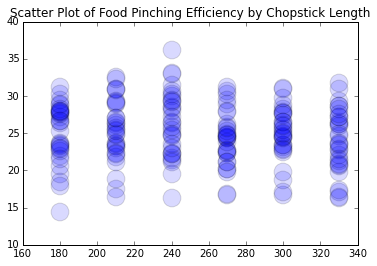

In [167]:
# Scatterplot of all the values to see the spread of the data
# define area for the circle/point, to make the points 'jitter'
area = np.pi * 100

plt.scatter(x=dataFrame['Chopstick.Length'],y=dataFrame['Food.Pinching.Efficiency'], s=area, alpha=0.15)
plt.title("Scatter Plot of Food Pinching Efficiency by Chopstick Length")
plt.show()

y = -0.00783225806452x + 27.0028172043


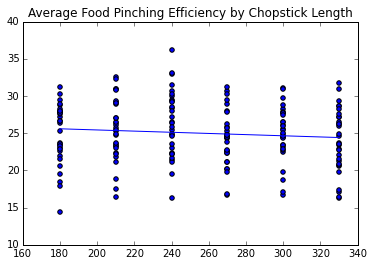

In [168]:
# Overlay the best fit line for the meansByChopstickLength
# Use slope intercept form y = mx + b
# m is the slope
# b is the y intercept where x = 0
m, b = np.polyfit(dataFrame['Chopstick.Length'], dataFrame['Food.Pinching.Efficiency'], 1)
plt.scatter(x=dataFrame['Chopstick.Length'], y=dataFrame['Food.Pinching.Efficiency'])
plt.plot(dataFrame['Chopstick.Length'], m*dataFrame['Chopstick.Length'] + b, '-')
plt.title("Average Food Pinching Efficiency by Chopstick Length")

print 'y = ' + str(m) + 'x + ' + str(b)

Since we only have a limited number of data points in the plot above for the meanChopstickLengths I wanted to plot the trendline for the entire sample and see if the linear equation remains the the same or approximate.

y = -0.00783225806452x + 27.0028172043  (means of the sample)  
y = -0.00783225806452x + 27.0028172043  (sample population)

The linear equations are equal.

### Histograms of "Food Piniching Efficiency"
Let's review these 31 samples and plot a histogram for the chopstick length of 180mm.

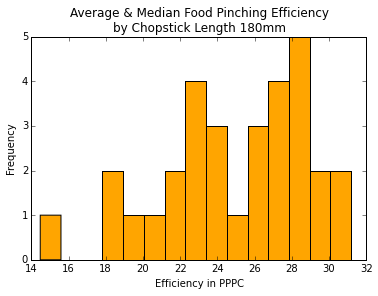

In [169]:
# Build the list of dataFrames 
cs180 = dataFrame[dataFrame['Chopstick.Length']== 180]
cs180 = cs180.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

cs210 = dataFrame[dataFrame['Chopstick.Length']== 210]
cs210 = cs210.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

cs240 = dataFrame[dataFrame['Chopstick.Length']== 240]
cs240 = cs240.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

cs270 = dataFrame[dataFrame['Chopstick.Length']== 270]
cs270 = cs270.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

cs300 = dataFrame[dataFrame['Chopstick.Length']== 300]
cs300 = cs300.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

cs330 = dataFrame[dataFrame['Chopstick.Length']== 330]
cs330 = cs330.sort(['Food.Pinching.Efficiency'], ascending=[1]).reset_index()

plt.hist(x=cs180['Food.Pinching.Efficiency'], bins=15,color='orange')
plt.xlabel("Efficiency in PPPC")
plt.ylabel("Frequency")
plt.title("Average & Median Food Pinching Efficiency \nby Chopstick Length 180mm")
plt.show()

We can see that the histogram is negatively skewed.

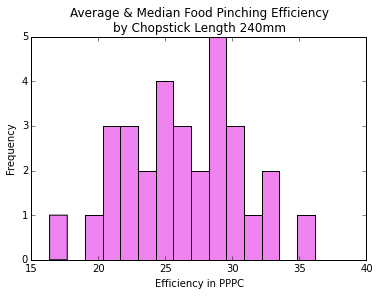

In [170]:
plt.figure()
plt.hist(x=cs240['Food.Pinching.Efficiency'], bins=15, color='violet')
plt.xlabel("Efficiency in PPPC")
plt.ylabel("Frequency")
plt.title("Average & Median Food Pinching Efficiency \nby Chopstick Length 240mm")
plt.show()

The histogram of the 240mm chopstick is more likely normal than than the 180mm chopstick PPPC frequency.

## 6. Based on the scatterplot created from the code above, interpret the relationship you see. What do you notice?
Pinching Efficiency increases from a length of 160 mm to 240mm and then pinching efficiency begins to decrease once the chopsticks are longer than 240mm.  Food Piniching Efficiency peaks with the 240mm chopsticks.


### In the abstract the researchers stated that their results showed food-pinching performance was significantly affected by the length of the chopsticks, and that chopsticks of about 240 mm long were optimal for adults.

## 7a. Based on the data you have analyzed, do you agree with the claim?
Yes

## 7b. Why?
The mean Efficiency in PPPC was highest (26.32) at a chopstick length of 240mm.  When chopsticks are longer than 240mm the mean Efficiency in PPPC decreases.  

A Chopstick of 240mm reaches a peak Food Piniching Efficiency of 26.32.

Using Pearson Correlation we can see a correlation exists between the two variables.  A negative correlation.

### Results
Using the Anova Test we can verify the statistical significance of the data by testing the NULL Hypothesis.

>"In inferential statistics the null hypothesis usually refers to a general statement or default position that there is no relationship between two measured phenomena, or no difference among groups."

The null hypothesis, for the overall F-test for this experiment would be that all 6 chopstick lengths produce the same food piniching efficiency, on average. 

The critical value is the number that the test statistic must exceed to reject the test. In this case, Fcrit(5,150) = 2.27 at α = 0.05. Since F=1.32 < 2.27, the results are significant at the 5% significance level. 

One would ACCEPT the null hypothesis, concluding that there is strong evidence that the expected values in the six groups are similar. The p-value for this test is 0.26.

Well this just disproves that chopsticks of 240mm are better.  My NULL Hypothesis is wrong or my F critical value is wrong, or my Anova test has the incorrect data being applied.  O_o

###### Find F Critical
[Table](http://home.ubalt.edu/ntsbarsh/Business-stat/StatistialTables.pdf)

v1 = n-1 -> 6- 1 = 5  
V2 = n-1 -> 31-1 = 30 * 5 = 150  

F Critical (5,150) = 2.27  

In [171]:
# http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.f_oneway.html
f_value, p_value = f_oneway(cs180['Food.Pinching.Efficiency'], cs210['Food.Pinching.Efficiency'], 
                            cs240['Food.Pinching.Efficiency'], cs270['Food.Pinching.Efficiency'], 
                            cs300['Food.Pinching.Efficiency'], cs330['Food.Pinching.Efficiency'])
f_value, p_value

(1.3209670540350906, 0.25713681077294981)

### Anova  Test
[Anova Documnetation](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.f_oneway.html)


Without performing a statistical test we cannot know for certain if the effect of chopstick length was significant in a statistical sense.  Investigate how to assess the statistical significance of the results.

#### Assumptions:
1. The samples are independant  
     Yes
2. Each sample is from a normally distrubted population  
     Yes
3. The population standard deviation of the groups are all equal  
     The Standard Deviations are close but not exactly equal.  

"How can we make multiple comparisons?"
http://www.itl.nist.gov/div898/handbook/prc/section4/prc47.htm
>The ANOVA uses the F test to determine whether there exists a significant difference among treatment means or interactions. In this sense it is a preliminary test that informs us if we should continue the investigation of the data at hand.

>If the null hypothesis (no difference among treatments or interactions) is accepted, there is an implication that no relation exists between the factor levels and the response. There is not much we can learn, and we are finished with the analysis.

>When the F test rejects the null hypothesis, we usually want to undertake a thorough analysis of the nature of the factor-level effects.

##### Examples:  

**f value > f critical value**  
One would reject the null hypothesis, concluding that there is strong evidence that the expected values in the three groups differ. If our f value > than f critical value.

**f value < f critical value**  
One would accept the null hypothesis, concluding that there is strong evidence that the exepected values in the groups are similar.  If our f value < than f critical value.

The f-critical value is the number that the test statistic must exceed to reject the test.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3915e1b6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3915ae1610>]], dtype=object)

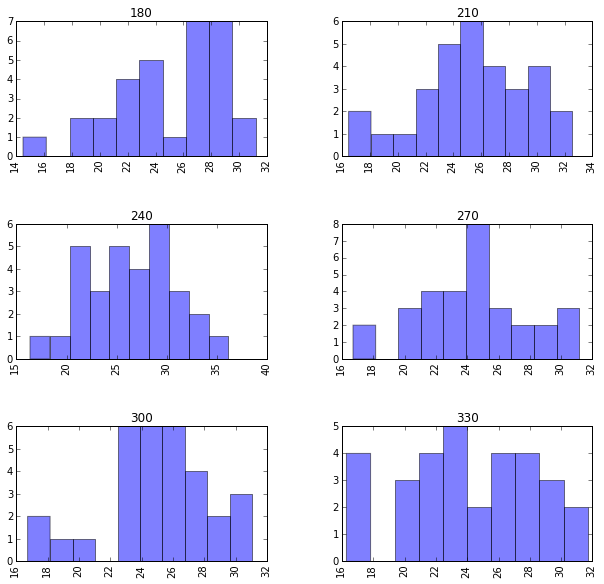

In [172]:
# plot the histograms for each Chopstick length
# to check for a normally distributed population
dataFrame['Food.Pinching.Efficiency'].hist(by=dataFrame['Chopstick.Length'], figsize=(10, 10), bins=10,alpha=0.5)

We know the samples are independant.  
We can see the samples have a likely normal distribution.   
*However the 180mm Chopstick length could also be skewed to the right. * 




### Standard Devitations

In [173]:
sd = pd.Series(cs180['Food.Pinching.Efficiency'].std(), index=['180'])
sd['210'] = cs210['Food.Pinching.Efficiency'].std()
sd['240'] = cs240['Food.Pinching.Efficiency'].std()
sd['270'] = cs270['Food.Pinching.Efficiency'].std()
sd['300'] = cs300['Food.Pinching.Efficiency'].std()
sd['330'] = cs330['Food.Pinching.Efficiency'].std()
sd

180    4.020612
210    4.116344
240    4.457579
270    3.713268
300    3.560044
330    4.198898
dtype: float64

The standard deviations for each of the chopstick lenghts are not all equal.

### Tukey's Range Test
https://en.wikipedia.org/wiki/Tukey%27s_range_test

First attempt to understand and use Tukey's Range Test


All the groups are similar so we can keep the f value statistic.

In [174]:
# http://jpktd.blogspot.com/2013/03/multiple-comparison-and-tukey-hsd-or_25.html
posthoc_result = pairwise_tukeyhsd(dataFrame['Food.Pinching.Efficiency'], dataFrame['Chopstick.Length'])
print posthoc_result       

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 180    210    0.5487  -2.3943 3.4918 False 
 180    240    1.3877  -1.5553 4.3308 False 
 180    270   -0.6113  -3.5543 2.3318 False 
 180    300    0.0329  -2.9102 2.976  False 
 180    330   -0.9355  -3.8785 2.0076 False 
 210    240    0.839    -2.104 3.7821 False 
 210    270    -1.16   -4.1031 1.7831 False 
 210    300   -0.5158  -3.4589 2.4273 False 
 210    330   -1.4842  -4.4273 1.4589 False 
 240    270    -1.999  -4.9421 0.944  False 
 240    300   -1.3548  -4.2979 1.5882 False 
 240    330   -2.3232  -5.2663 0.6198 False 
 270    300    0.6442  -2.2989 3.5873 False 
 270    330   -0.3242  -3.2673 2.6189 False 
 300    330   -0.9684  -3.9114 1.9747 False 
--------------------------------------------


### Sample Size Validation
Validating we have similar sized samples for each Chopstick.Length.  The box plot shows us the Chopstick lengths and their ranges, quartiles, and means in one plot easy to review.  Using this plot we can see that a chopstick length of 240mm also had the largest range of food piniching efficiency.

In [175]:
counts = dataFrame.groupby('Chopstick.Length').count()
counts

,Food.Pinching.Efficiency,Individual
Chopstick.Length,,
180,31,31
210,31,31
240,31,31
270,31,31
300,31,31
330,31,31


In [177]:
dataFrame['Food.Pinching.Efficiency'].describe()

count    186.000000
mean      25.005591
std        4.039693
min       14.470000
25%       22.540000
50%       24.905000
75%       27.932500
max       36.150000
Name: Food.Pinching.Efficiency, dtype: float64

#### Boxplot and Histogram for the PPPC
Plot a boxplot and histogram of PPPC for the entire sample and check if the distrubution is likely normal.

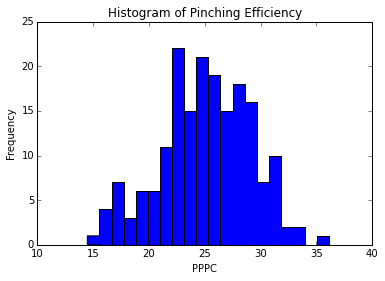

In [178]:
# plot a histogram with 10 bins  - bin size ~ 1.46
plt.hist(dataFrame['Food.Pinching.Efficiency'], bins=20)
plt.title("Histogram of Pinching Efficiency")
plt.xlabel("PPPC")
plt.ylabel("Frequency")

The data is likely normally distributed in the histogram.

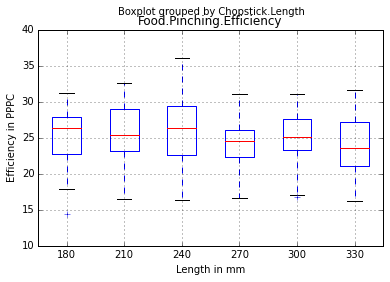

In [179]:
#Slice the data for a nice box plot
x_sec = dataFrame[['Chopstick.Length', 'Food.Pinching.Efficiency']]
plt.figure()
bp = x_sec.boxplot(by='Chopstick.Length')
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")

### Individual's Food Pinching Efficiency
Maybe some individuals have better dexterity than others.  We can see there is large deviation between different individuals.

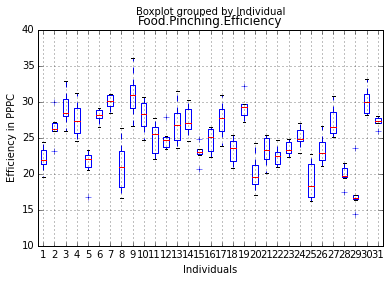

In [180]:
x_sec = dataFrame[['Food.Pinching.Efficiency', 'Individual']]
plt.figure()
bp = x_sec.boxplot(by='Individual')
plt.xlabel("Individuals")
plt.ylabel("Efficiency in PPPC")

## References
http://www.itl.nist.gov/div898/handbook/prc/section4/prc47.htm  

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.f_oneway.html  

http://pandas.pydata.org/  

http://www.graphpad.com/guides/prism/6/statistics/index.htm?f_ratio_and_anova_table_(one-way_anova).htm

https://en.wikipedia.org/wiki/F-distribution

http://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm  

http://stats.stackexchange.com/questions/12398/how-to-interpret-f-and-p-value-in-anova  

http://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm  

http://stattrek.com/online-calculator/f-distribution.aspx  

http://blog.minitab.com/blog/adventures-in-statistics/how-to-correctly-interpret-p-values

### Anova Example
[Example Analysis](https://en.wikipedia.org/wiki/F-test#One-way_ANOVA_example)

Consider an experiment to study the effect of three different levels of a factor on a response (e.g. three levels of a fertilizer on plant growth). If we had 6 observations for each level, we could write the outcome of the experiment in a table like this, where a1, a2, and a3 are the three levels of the factor being studied.
 
The null hypothesis, denoted H0, for the overall F-test for this experiment would be that all three levels of the factor produce the same response, on average.
 


The critical value is the number that the test statistic must exceed to reject the test. In this case, Fcrit(2,15) = 3.68 at α = 0.05. Since F=9.3 > 3.68, the **results are significant** at the 5% significance level. One would **reject the null hypothesis**, concluding that there is strong evidence that the expected values in the three groups differ. The p-value for this test is 0.002.

In [181]:
# Anova test example from wikipedia
# https://en.wikipedia.org/wiki/F-test#One-way_ANOVA_example
columns = ['a','b', 'c']

a = pd.Series([6,8,4,3,5,4])
b = pd.Series([8,12,9,11,6,8])
c = pd.Series([13,9,11,8,7,12])

f_value, p_value = f_oneway(a,b,c)
f_value, p_value



(9.264705882352942, 0.0023987773293929083)